### Block 1

In [66]:
import pandas as pd
import numpy as np

# Display settings
pd.options.display.float_format = "{:,.2f}".format

# -------------------------
# Load Weekly Revenue file
# -------------------------
df = pd.read_csv("Weekly_Revenue.csv")

pd.set_option("display.max_columns", None)

# Ensure correct types
df["Week"] = df["Week"].astype(int)

for col in ["FY24", "FY25", "FY26"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Sort by Week
df = df.sort_values("Week").reset_index(drop=True)


### Block 2

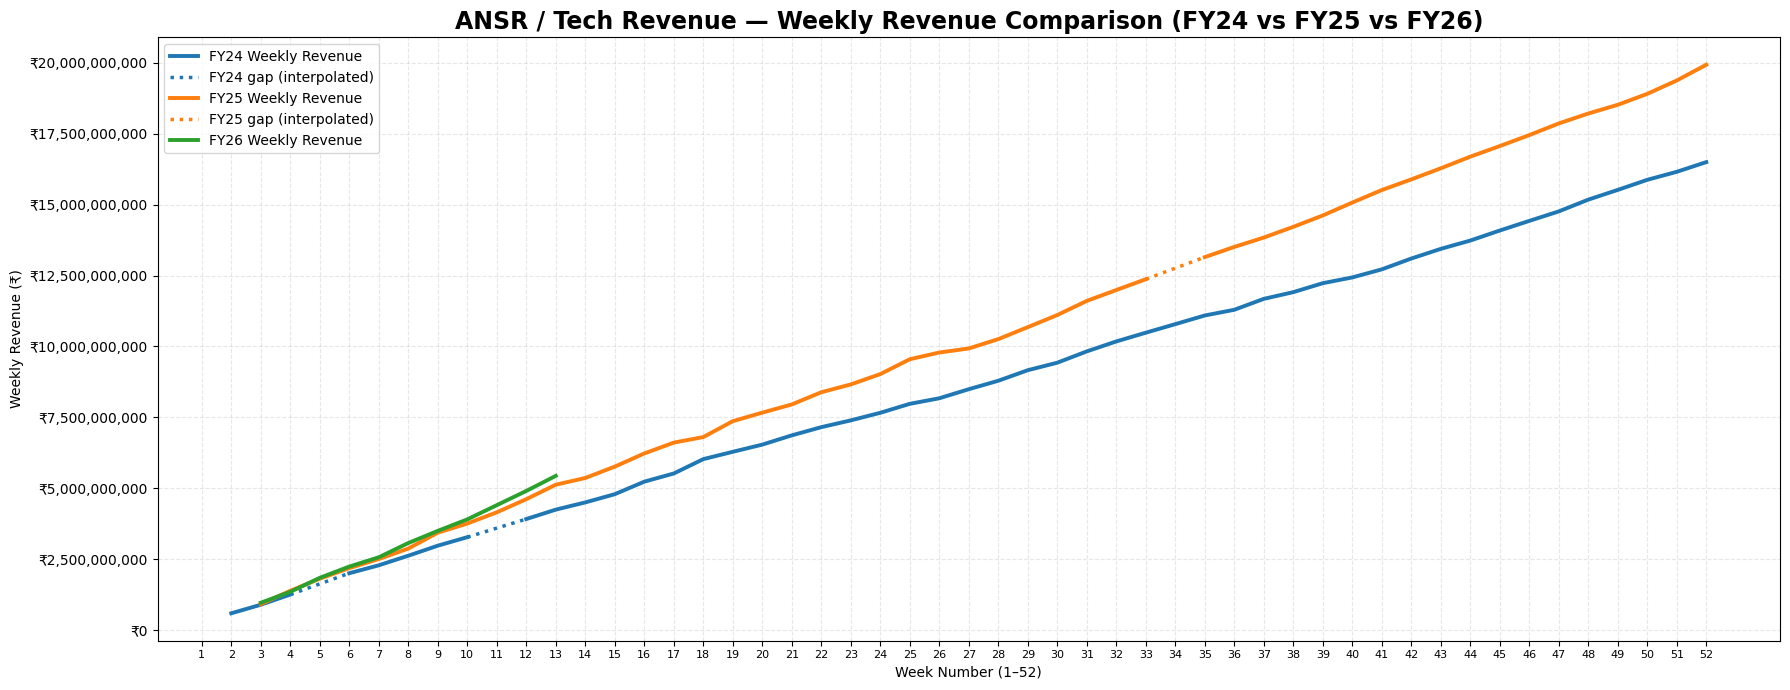

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# -----------------------------
# Load data
# -----------------------------
df = pd.read_csv("Weekly_Revenue.csv")

df["Week"] = df["Week"].astype(int)
df[["FY24", "FY25", "FY26"]] = df[["FY24", "FY25", "FY26"]].apply(
    pd.to_numeric, errors="coerce"
)

df = df.sort_values("Week")

# -----------------------------
# Helper: draw dotted gap only
# -----------------------------
def draw_gaps(x, y, color, label=None):
    for i in range(1, len(y) - 1):
        if pd.isna(y[i]) and not pd.isna(y[i - 1]) and not pd.isna(y[i + 1]):
            plt.plot(
                [x[i - 1], x[i + 1]],
                [y[i - 1], y[i + 1]],
                linestyle=":",
                linewidth=2.5,
                color=color,
                label=label
            )
            label = None  # avoid duplicate legend

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 7))

# FY24 — solid actual
plt.plot(
    df["Week"],
    df["FY24"],
    label="FY24 Weekly Revenue",
    linewidth=2.8,
    color="#1f77b4"
)

# FY24 — dotted gaps only
draw_gaps(df["Week"].values, df["FY24"].values, "#1f77b4", "FY24 gap (interpolated)")

# FY25 — solid actual
plt.plot(
    df["Week"],
    df["FY25"],
    label="FY25 Weekly Revenue",
    linewidth=2.8,
    color="#ff7f0e"
)

# FY25 — dotted gaps only
draw_gaps(df["Week"].values, df["FY25"].values, "#ff7f0e", "FY25 gap (interpolated)")

# FY26 — solid (no gaps)
plt.plot(
    df["Week"],
    df["FY26"],
    label="FY26 Weekly Revenue",
    linewidth=2.8,
    color="#2ca02c"
)

# -----------------------------
# Formatting
# -----------------------------
plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue — Weekly Revenue Comparison (FY24 vs FY25 vs FY26)",
    fontsize=17,
    weight="bold"
)

plt.xlabel("Week Number (1–52)")
plt.ylabel("Weekly Revenue (₹)")
plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()
# df.head(62)

### Block 3

In [80]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# --------------------------------
# Force browser rendering
# --------------------------------
pio.renderers.default = "browser"

# --------------------------------
# Load data
# --------------------------------
df = pd.read_csv("Weekly_Revenue.csv")

df["Week"] = df["Week"].astype(int)
df[["FY24", "FY25", "FY26"]] = df[["FY24", "FY25", "FY26"]].apply(
    pd.to_numeric, errors="coerce"
)

df = df.sort_values("Week")

# --------------------------------
# Helper: add dotted gap segments
# --------------------------------
def add_gap_segments(fig, x, y, fy_label, color):
    for i in range(1, len(y) - 1):
        if pd.isna(y[i]) and not pd.isna(y[i-1]) and not pd.isna(y[i+1]):
            fig.add_trace(
                go.Scatter(
                    x=[x[i-1], x[i+1]],
                    y=[y[i-1], y[i+1]],
                    mode="lines",
                    line=dict(dash="dot", width=3, color=color),
                    name=f"{fy_label} gap",
                    hovertemplate=(
                        f"<b>{fy_label} (Interpolated Gap)</b><br>"
                        "Week %{x[0]} → %{x[1]}<br>"
                        "<extra></extra>"
                    ),
                    showlegend=False
                ),
                row=1,
                col=1
            )

# --------------------------------
# Create subplot layout
# --------------------------------
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=False,
    vertical_spacing=0.08,
    row_heights=[0.7, 0.3],
    specs=[[{"type": "xy"}],
           [{"type": "table"}]]
)

# ---------- FY24 ----------
fig.add_trace(
    go.Scatter(
        x=df["Week"],
        y=df["FY24"],
        mode="lines+markers",
        name="FY24 Weekly Revenue",
        line=dict(width=3, color="#1f77b4"),
        marker=dict(size=5),
        hovertemplate=(
            "<b>FY24</b><br>"
            "Week %{x}<br>"
            "Revenue: ₹%{y:,.0f}<extra></extra>"
        )
    ),
    row=1,
    col=1
)

add_gap_segments(fig, df["Week"].values, df["FY24"].values, "FY24", "#1f77b4")

# ---------- FY25 ----------
fig.add_trace(
    go.Scatter(
        x=df["Week"],
        y=df["FY25"],
        mode="lines+markers",
        name="FY25 Weekly Revenue",
        line=dict(width=3, color="#ff7f0e"),
        marker=dict(size=5),
        hovertemplate=(
            "<b>FY25</b><br>"
            "Week %{x}<br>"
            "Revenue: ₹%{y:,.0f}<extra></extra>"
        )
    ),
    row=1,
    col=1
)

add_gap_segments(fig, df["Week"].values, df["FY25"].values, "FY25", "#ff7f0e")

# ---------- FY26 ----------
fig.add_trace(
    go.Scatter(
        x=df["Week"],
        y=df["FY26"],
        mode="lines+markers",
        name="FY26 Weekly Revenue",
        line=dict(width=3, color="#2ca02c"),
        marker=dict(size=5),
        hovertemplate=(
            "<b>FY26</b><br>"
            "Week %{x}<br>"
            "Revenue: ₹%{y:,.0f}<extra></extra>"
        )
    ),
    row=1,
    col=1
)

# --------------------------------
# Add table (FULL DATA or HEAD)
# --------------------------------
table_df = df.head(20)   # change to df for full table if needed

fig.add_trace(
    go.Table(
        header=dict(
            values=list(table_df.columns),
            fill_color="#EAEAEA",
            align="center",
            font=dict(size=12, color="black")
        ),
        cells=dict(
            values=[table_df[col] for col in table_df.columns],
            fill_color="white",
            align="right",
            font=dict(size=11)
        )
    ),
    row=2,
    col=1
)

# --------------------------------
# Layout
# --------------------------------
fig.update_layout(
    title=dict(
        text="ANSR / Tech Revenue — Weekly Revenue Comparison (FY24 vs FY25 vs FY26)",
        x=0.5,
        font=dict(size=22)
    ),
    xaxis=dict(
        title="Week Number (1–52)",
        tickmode="linear",
        tick0=1,
        dtick=1
    ),
    yaxis=dict(
        title="Weekly Revenue (₹)",
        tickformat=","
    ),
    hovermode="x unified",
    width=1400,
    height=900,
    legend=dict(
        orientation="h",
        y=1.05,
        x=0.5,
        xanchor="center"
    ),
    template="plotly_white"
)

fig.show()


### Block 4

In [83]:
weekly_change_df = df.copy()

# Absolute weekly change
weekly_change_df["Actual_Revenue_FY24"] = weekly_change_df["FY24"].diff()
weekly_change_df["Actual_Revenue_FY25"] = weekly_change_df["FY25"].diff()
weekly_change_df["Actual_Revenue_FY26"] = weekly_change_df["FY26"].diff()

# Weekly percentage change (no forward fill)
weekly_change_df["FY24_Weekly_%"] = (
    weekly_change_df["Actual_Revenue_FY24"].pct_change(fill_method=None) * 100
)
weekly_change_df["FY25_Weekly_%"] = (
    weekly_change_df["Actual_Revenue_FY25"].pct_change(fill_method=None) * 100
)
weekly_change_df["FY26_Weekly_%"] = (
    weekly_change_df["Actual_Revenue_FY26"].pct_change(fill_method=None) * 100
)

# Round percentage columns
weekly_change_df[[
    "FY24_Weekly_%", "FY25_Weekly_%", "FY26_Weekly_%"
]] = weekly_change_df[[
    "FY24_Weekly_%", "FY25_Weekly_%", "FY26_Weekly_%"
]].round(2)

# --------------------------------
# Build final dataframe
# --------------------------------
final_df = weekly_change_df[[
    "FY24", "FY25", "FY26",
    "Actual_Revenue_FY24", "Actual_Revenue_FY25", "Actual_Revenue_FY26",
    "FY24_Weekly_%", "FY25_Weekly_%", "FY26_Weekly_%"
]].copy()

# Set Week as index
final_df.index = weekly_change_df["Week"]
final_df.index.name = "Week"

# MultiIndex columns
final_df.columns = pd.MultiIndex.from_tuples([
    ("Revenue", "FY24"),
    ("Revenue", "FY25"),
    ("Revenue", "FY26"),

    ("Actual Revenue Change WoW", "FY24"),
    ("Actual Revenue Change WoW", "FY25"),
    ("Actual Revenue Change WoW", "FY26"),

    ("% Revenue Change WoW", "FY24"),
    ("% Revenue Change WoW", "FY25"),
    ("% Revenue Change WoW", "FY26"),
])

# --------------------------------
# Styling
# --------------------------------
styled_df = (
    final_df
    .style
    .set_table_styles([
        {
            "selector": "table",
            "props": [
                ("border-collapse", "collapse"),
                ("border", "2px solid #555"),
                ("width", "100%")
            ]
        },
        {
            "selector": "th",
            "props": [
                ("border", "1px solid #777"),
                ("text-align", "center"),
                ("vertical-align", "middle"),
                ("font-weight", "bold"),
                ("background-color", "#2b2b2b"),
                ("color", "white"),
                ("padding", "10px"),
                ("min-width", "85px")
            ]
        },
        {
            "selector": "td",
            "props": [
                ("border", "1px solid #777"),
                ("text-align", "right"),
                ("padding", "8px"),
                ("min-width", "60px")
            ]
        },
        {
            "selector": ".row_heading",
            "props": [
                ("border", "1px solid #777"),
                ("text-align", "center"),
                ("font-weight", "bold"),
                ("background-color", "#1f1f1f"),
                ("color", "white"),
                ("min-width", "40px")
            ]
        }
    ])
    .format(
        {
            ("Revenue", "FY24"): "₹{:,.0f}",
            ("Revenue", "FY25"): "₹{:,.0f}",
            ("Revenue", "FY26"): "₹{:,.0f}",

            ("Actual Revenue Change", "FY24"): "₹{:,.0f}",
            ("Actual Revenue Change", "FY25"): "₹{:,.0f}",
            ("Actual Revenue Change", "FY26"): "₹{:,.0f}",

            ("% Revenue Change WoW", "FY24"): "{:.2f}%",
            ("% Revenue Change WoW", "FY25"): "{:.2f}%",
            ("% Revenue Change WoW", "FY26"): "{:.2f}%"
        },
        na_rep="-"
    )
)

styled_df

### Block 5

In [82]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import webbrowser

# --------------------------------
# Force browser rendering
# --------------------------------
pio.renderers.default = "browser"

# --------------------------------
# Load data
# --------------------------------
df = pd.read_csv("Weekly_Revenue.csv")

df["Week"] = df["Week"].astype(int)
df[["FY24", "FY25", "FY26"]] = df[["FY24", "FY25", "FY26"]].apply(
    pd.to_numeric, errors="coerce"
)

df = df.sort_values("Week")

# --------------------------------
# Create weekly change dataframe
# --------------------------------
weekly_change_df = df.copy()

weekly_change_df["Actual_Revenue_FY24"] = weekly_change_df["FY24"].diff()
weekly_change_df["Actual_Revenue_FY25"] = weekly_change_df["FY25"].diff()
weekly_change_df["Actual_Revenue_FY26"] = weekly_change_df["FY26"].diff()

weekly_change_df["FY24_Weekly_%"] = (
    weekly_change_df["Actual_Revenue_FY24"].pct_change(fill_method=None) * 100
)
weekly_change_df["FY25_Weekly_%"] = (
    weekly_change_df["Actual_Revenue_FY25"].pct_change(fill_method=None) * 100
)
weekly_change_df["FY26_Weekly_%"] = (
    weekly_change_df["Actual_Revenue_FY26"].pct_change(fill_method=None) * 100
)

weekly_change_df[[
    "FY24_Weekly_%", "FY25_Weekly_%", "FY26_Weekly_%"
]] = weekly_change_df[[
    "FY24_Weekly_%", "FY25_Weekly_%", "FY26_Weekly_%"
]].round(2)

# --------------------------------
# Build final dataframe
# --------------------------------
final_df = weekly_change_df[[
    "FY24", "FY25", "FY26",
    "Actual_Revenue_FY24", "Actual_Revenue_FY25", "Actual_Revenue_FY26",
    "FY24_Weekly_%", "FY25_Weekly_%", "FY26_Weekly_%"
]].copy()

final_df.index = weekly_change_df["Week"]
final_df.index.name = "Week"

final_df.columns = pd.MultiIndex.from_tuples([
    ("Revenue", "FY24"),
    ("Revenue", "FY25"),
    ("Revenue", "FY26"),

    ("Actual Revenue Change", "FY24"),
    ("Actual Revenue Change", "FY25"),
    ("Actual Revenue Change", "FY26"),

    ("Weekly Revenue % Change", "FY24"),
    ("Weekly Revenue % Change", "FY25"),
    ("Weekly Revenue % Change", "FY26"),
])

# --------------------------------
# Style the dataframe
# --------------------------------
styled_df = (
    final_df
    .style
    .set_table_styles([
        {
            "selector": "table",
            "props": [
                ("border-collapse", "collapse"),
                ("border", "2px solid #555"),
                ("width", "100%")
            ]
        },
        {
            "selector": "th",
            "props": [
                ("border", "1px solid #777"),
                ("text-align", "center"),
                ("vertical-align", "middle"),
                ("font-weight", "bold"),
                ("background-color", "#2b2b2b"),
                ("color", "white"),
                ("padding", "10px"),
                ("min-width", "90px")
            ]
        },
        {
            "selector": "td",
            "props": [
                ("border", "1px solid #777"),
                ("text-align", "right"),
                ("padding", "8px"),
                ("min-width", "60px")
            ]
        },
        {
            "selector": ".row_heading",
            "props": [
                ("border", "1px solid #777"),
                ("text-align", "center"),
                ("font-weight", "bold"),
                ("background-color", "#1f1f1f"),
                ("color", "white"),
                ("min-width", "40px")
            ]
        }
    ])
    .format(
        {
            ("Revenue", "FY24"): "₹{:,.0f}",
            ("Revenue", "FY25"): "₹{:,.0f}",
            ("Revenue", "FY26"): "₹{:,.0f}",

            ("Actual Revenue Change", "FY24"): "₹{:,.0f}",
            ("Actual Revenue Change", "FY25"): "₹{:,.0f}",
            ("Actual Revenue Change", "FY26"): "₹{:,.0f}",

            ("Weekly Revenue % Change", "FY24"): "{:.2f}%",
            ("Weekly Revenue % Change", "FY25"): "{:.2f}%",
            ("Weekly Revenue % Change", "FY26"): "{:.2f}%"
        },
        na_rep="-"
    )
)

# --------------------------------
# Helper: dotted gap connection
# --------------------------------
def add_gap_segments(fig, x, y, color):
    for i in range(1, len(y) - 1):
        if pd.isna(y[i]) and not pd.isna(y[i-1]) and not pd.isna(y[i+1]):
            fig.add_trace(
                go.Scatter(
                    x=[x[i-1], x[i+1]],
                    y=[y[i-1], y[i+1]],
                    mode="lines",
                    line=dict(dash="dot", width=3, color=color),
                    showlegend=False,
                    hoverinfo="skip"
                )
            )

# --------------------------------
# Create Plotly figure
# --------------------------------
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Week"], y=df["FY24"],
    mode="lines+markers",
    name="FY24",
    line=dict(width=3, color="#1f77b4"),
    hovertemplate="FY24<br>Week %{x}<br>₹%{y:,.0f}<extra></extra>"
))
add_gap_segments(fig, df["Week"].values, df["FY24"].values, "#1f77b4")

fig.add_trace(go.Scatter(
    x=df["Week"], y=df["FY25"],
    mode="lines+markers",
    name="FY25",
    line=dict(width=3, color="#ff7f0e"),
    hovertemplate="FY25<br>Week %{x}<br>₹%{y:,.0f}<extra></extra>"
))
add_gap_segments(fig, df["Week"].values, df["FY25"].values, "#ff7f0e")

fig.add_trace(go.Scatter(
    x=df["Week"], y=df["FY26"],
    mode="lines+markers",
    name="FY26",
    line=dict(width=3, color="#2ca02c"),
    hovertemplate="FY26<br>Week %{x}<br>₹%{y:,.0f}<extra></extra>"
))

fig.update_layout(
    title="ANSR / Tech Revenue — Weekly Revenue Comparison",
    xaxis_title="Week",
    yaxis_title="Revenue (₹)",
    hovermode="x unified",
    width=1400,
    height=700,
    template="plotly_white",
    legend=dict(orientation="h", y=1.05, x=0.5, xanchor="center")
)

# --------------------------------
# Convert both to HTML
# --------------------------------
plot_html = fig.to_html(full_html=False, include_plotlyjs="cdn")
table_html = styled_df.to_html()

# --------------------------------
# Combine into one HTML page
# --------------------------------
final_html = f"""
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>Weekly Revenue Dashboard</title>
    <style>
        body {{
            background-color: #1e1e1e;
            color: white;
            font-family: Arial, sans-serif;
            margin: 20px;
        }}
        h2 {{
            text-align: center;
        }}
        .table-container {{
            margin-top: 40px;
        }}
    </style>
</head>
<body>

<h2>ANSR / Tech Revenue Dashboard</h2>

{plot_html}

<div class="table-container">
    <h2>Weekly Revenue Analysis</h2>
    {table_html}
</div>

</body>
</html>
"""

# --------------------------------
# Save & open in browser
# --------------------------------
output_file = "weekly_revenue_dashboard.html"
with open(output_file, "w", encoding="utf-8") as f:
    f.write(final_html)

webbrowser.open(output_file)


True

### Block 6

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, HTML

# --------------------------------
# Force browser rendering (optional)
# --------------------------------
pio.renderers.default = "browser"

# --------------------------------
# Load data
# --------------------------------
df = pd.read_csv("Weekly_Revenue.csv")

df["Week"] = df["Week"].astype(int)
df[["FY24", "FY25", "FY26"]] = df[["FY24", "FY25", "FY26"]].apply(
    pd.to_numeric, errors="coerce"
)

df = df.sort_values("Week")

# --------------------------------
# Helper: draw dotted lines ONLY for gaps
# --------------------------------
def add_gap_segments(fig, x, y, label, color):
    for i in range(1, len(y) - 1):
        if pd.isna(y[i]) and not pd.isna(y[i - 1]) and not pd.isna(y[i + 1]):
            fig.add_trace(
                go.Scatter(
                    x=[x[i - 1], x[i + 1]],
                    y=[y[i - 1], y[i + 1]],
                    mode="lines",
                    line=dict(color=color, width=3, dash="dot"),
                    showlegend=False,
                    hoverinfo="skip"
                )
            )

# --------------------------------
# Create figure
# --------------------------------
fig = go.Figure()

# ---------- FY24 ----------
fig.add_trace(
    go.Scatter(
        x=df["Week"],
        y=df["FY24"],
        mode="lines+markers",
        name="FY24",
        line=dict(color="#1f77b4", width=3),
        marker=dict(size=5),
        hovertemplate="<b>FY24</b><br>Week %{x}<br>₹%{y:,.0f}<extra></extra>"
    )
)
add_gap_segments(fig, df["Week"].values, df["FY24"].values, "FY24", "#1f77b4")

# ---------- FY25 ----------
fig.add_trace(
    go.Scatter(
        x=df["Week"],
        y=df["FY25"],
        mode="lines+markers",
        name="FY25",
        line=dict(color="#ff7f0e", width=3),
        marker=dict(size=5),
        hovertemplate="<b>FY25</b><br>Week %{x}<br>₹%{y:,.0f}<extra></extra>"
    )
)
add_gap_segments(fig, df["Week"].values, df["FY25"].values, "FY25", "#ff7f0e")

# ---------- FY26 ----------
fig.add_trace(
    go.Scatter(
        x=df["Week"],
        y=df["FY26"],
        mode="lines+markers",
        name="FY26",
        line=dict(color="#2ca02c", width=3),
        marker=dict(size=5),
        hovertemplate="<b>FY26</b><br>Week %{x}<br>₹%{y:,.0f}<extra></extra>"
    )
)

# --------------------------------
# Professional layout
# --------------------------------
fig.update_layout(
    title=dict(
        text="ANSR / Tech Revenue — Weekly Revenue Comparison",
        x=0.02,
        xanchor="left",
        font=dict(
            family="Inter, Segoe UI, Arial",
            size=22,
            color="#1f2937"
        )
    ),

    font=dict(
        family="Inter, Segoe UI, Arial",
        size=13,
        color="#1f2937"
    ),

    legend=dict(
        orientation="h",
        y=1.08,
        x=0.5,
        xanchor="center",
        font=dict(size=13)
    ),

    hovermode="x unified",

    height=600,

    margin=dict(l=90, r=40, t=90, b=70),

    plot_bgcolor="white",
    paper_bgcolor="white",
)

# --------------------------------
# X-axis: show ALL weeks
# --------------------------------
fig.update_xaxes(
    title_text="Week Number",
    tickmode="linear",
    tick0=1,
    dtick=1,
    showgrid=True,
    gridcolor="#E5E7EB",
    zeroline=False,
    tickfont=dict(size=11),
    title_font=dict(size=14)
)

# --------------------------------
# Y-axis: FULL ₹ values (no B/M)
# --------------------------------
fig.update_yaxes(
    title_text="Weekly Revenue (₹)",
    tickformat=",",
    showgrid=True,
    gridcolor="#E5E7EB",
    zeroline=False,
    tickfont=dict(size=12),
    title_font=dict(size=14)
)

# --------------------------------
# Generate Professional HTML Output
# --------------------------------

# 1. Get Plot HTML (partial)
plot_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

# 2. Get Table HTML with styling
table_html = df.to_html(index=False, classes='revenue-table', border=0, na_rep='-')

# 3. Combine into a professional dashboard layout
full_html_content = f"""
<!DOCTYPE html>
<html>
<head>
<style>
    @import url('https://fonts.googleapis.com/css2?family=Inter:wght@400;500;600&display=swap');
    
    .dashboard-container {{
        font-family: 'Inter', -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Helvetica, Arial, sans-serif;
        color: #1f2937;
        background-color: #f3f4f6;
        padding: 24px;
        border-radius: 12px;
        max-width: 1600px;
        margin: 0 auto;
    }}
    
    .card {{
        background-color: #ffffff;
        border-radius: 12px;
        box-shadow: 0 4px 6px -1px rgba(0, 0, 0, 0.1), 0 2px 4px -1px rgba(0, 0, 0, 0.06);
        padding: 24px;
        margin-bottom: 24px;
        border: 1px solid #e5e7eb;
    }}
    
    .header-section {{
        text-align: left;
        margin-bottom: 20px;
        border-bottom: 2px solid #f3f4f6;
        padding-bottom: 16px;
    }}
    
    .header-section h2 {{
        font-size: 20px;
        font-weight: 600;
        color: #111827;
        margin: 0;
    }}
    
    .header-section p {{
        font-size: 14px;
        color: #6b7280;
        margin-top: 4px;
        margin-bottom: 0;
    }}

    .table-wrapper {{
        overflow-x: auto;
        border-radius: 8px;
        border: 1px solid #e5e7eb;
    }}

    /* Table Styling */
    .revenue-table {{
        width: 100%;
        border-collapse: collapse;
        font-size: 14px;
        background-color: white;
    }}
    
    .revenue-table thead {{
        background-color: #f9fafb;
    }}
    
    .revenue-table th {{
        padding: 12px 24px;
        text-align: left;
        font-weight: 600;
        color: #374151;
        text-transform: uppercase;
        font-size: 12px;
        letter-spacing: 0.05em;
        border-bottom: 1px solid #e5e7eb;
    }}
    
    .revenue-table td {{
        padding: 16px 24px;
        border-bottom: 1px solid #e5e7eb;
        color: #4b5563;
        white-space: nowrap;
        font-variant-numeric: tabular-nums;
    }}
    
    .revenue-table tbody tr:hover {{
        background-color: #f9fafb;
        transition: background-color 0.2s;
    }}
    
    .revenue-table tbody tr:last-child td {{
        border-bottom: none;
    }}
    
    /* Responsive Scrollbar styling */
    .table-wrapper::-webkit-scrollbar {{
        height: 8px;
        width: 8px;
    }}
    .table-wrapper::-webkit-scrollbar-track {{
        background: #f1f1f1;
        border-radius: 4px;
    }}
    .table-wrapper::-webkit-scrollbar-thumb {{
        background: #d1d5db;
        border-radius: 4px;
    }}
    .table-wrapper::-webkit-scrollbar-thumb:hover {{
        background: #9ca3af;
    }}
</style>
</head>
<body>
    <div class="dashboard-container">
        <!-- Visual Analysis Card -->
        <div class="card">
            <div class="header-section">
                <h2>Revenue Trend Analysis</h2>
                <p>Visual comparison of weekly revenue across fiscal years (FY24 - FY26)</p>
            </div>
            {plot_html}
        </div>

        <!-- Data Table Card -->
        <div class="card">
            <div class="header-section">
                <h2>Detailed Weekly Data</h2>
                <p>Comprehensive breakdown of revenue figures per week</p>
            </div>
            <div class="table-wrapper">
                {table_html}
            </div>
        </div>
    </div>
</body>
</html>
"""

display(HTML(full_html_content))
